In [1]:
import tensorflow as tf
import keras
import cv2

In [2]:
import os, sys
os.listdir()

['tomatoe_onions_real_time_classification.ipynb',
 'README.md',
 'Object_detection_tomatoe_onion_claassification.py',
 'tomatoe_onions',
 'pure_model.h5',
 '.ipynb_checkpoints']

# Image processing

In [3]:
base_dir = os.getcwd()

In [4]:
from os import listdir
from os.path import isfile, join
mypath = 'tomatoe_onions/train/onions/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [5]:
onlyfiles[:3]

['IMG_20200716_030657_918.jpg',
 'IMG_20200716_030558_087.jpg',
 'IMG_20200716_030634_462.jpg']

In [6]:
train_dir = 'tomatoe_onions/train'
test_dir = 'tomatoe_onions/test'
default_dir = 'tomatoe_onions'
train_onion, train_tomatoe, test_onion, test_tomatoe = [], [],[],[]
def get_data():
    # get data's on training cat
    current_dir = train_dir+'/tomatoes/'
    train_tomatoe = [f for f in listdir(current_dir) if isfile(join(current_dir, f))]
    #print(train_tomatoe)
    
    # get data's on training dog
    current_dir = train_dir +'/onions/'
    train_onion = [f for f in listdir(current_dir) if isfile(join(current_dir, f))]
    
    # get data's on test cat
    current_dir = test_dir+'/tomatoes/'
    test_tomatoe = [f for f in listdir(current_dir) if isfile(join(current_dir, f))]
    
    # get data's on test dog
    current_dir = test_dir +'/onions/'
    test_onion = [f for f in listdir(current_dir) if isfile(join(current_dir, f))]
    return train_tomatoe, train_onion, test_tomatoe, test_onion

train_tomatoe, train_onion, test_tomatoe, test_onion = get_data()



In [7]:
len(train_tomatoe),len(train_onion),len(test_tomatoe),len(test_onion)

(37, 47, 10, 10)

In [8]:

os.getcwd()

'/home/odemakinde/Desktop/Computer-Vision-master/Computer-Vision/tomatoe_onions real time image classification'

In [9]:
os.listdir()

['tomatoe_onions_real_time_classification.ipynb',
 'README.md',
 'Object_detection_tomatoe_onion_claassification.py',
 'tomatoe_onions',
 'pure_model.h5',
 '.ipynb_checkpoints']

In [17]:
import numpy as np
np.random.seed(100)

import keras
from keras.preprocessing import image

train_images, train_target = [], []
for i in train_tomatoe:
    try:
        directory = train_dir + '/tomatoes/' + str(i)
        img = image.load_img(directory, target_size = (224,224), grayscale = False)
        img=image.img_to_array(img)
        img = img/255
        train_images.append(img)
        train_target.append(0)
    except OSError as err:
        continue

for i in train_onion:
    try:
        directory = train_dir + '/onions/' + str(i)
        img = image.load_img(directory, target_size = (224,224), grayscale = False)
        img=image.img_to_array(img)
        img = img/255
        train_images.append(img)
        train_target.append(1)
    
    except OSError as err:

        continue
for i in test_tomatoe:
    try:
        directory = test_dir + '/tomatoes/' + str(i)
        img = image.load_img(directory, target_size = (224,224), grayscale = False)
        img=image.img_to_array(img)
        img = img/255
        train_images.append(img)
        train_target.append(0)
    except OSError as err:
        continue

for i in test_onion:
    try:
        directory = test_dir + '/onions/' + str(i)
        img = image.load_img(directory, target_size = (224,224), grayscale = False)
        img=image.img_to_array(img)
        img = img/255
        train_images.append(img)
        train_target.append(1)
    
    except OSError as err:
        pass



In [18]:
#image.load_img??

In [19]:
train_images = np.array(train_images)
train_target = np.array(train_target)
train_images.shape, train_target.shape

((104, 224, 224, 3), (104,))

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_images, train_target, train_size = 0.7, random_state = 42, stratify = train_target)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((72, 224, 224, 3), (32, 224, 224, 3), (72,), (32,))

In [21]:
y_train

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0])

In [22]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


# Training the network


In [27]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(8, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 110, 110, 8)       1032      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 55, 55, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 24200)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               2420100   
_________________________________________________________________
dense_4 (Dense)              (None, 50)               

In [28]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [29]:
epochs = 5

history = model.fit(x_train, y_train, epochs=10, validation_data = (x_test, y_test) ,batch_size=10)

Epoch 1/10
8/8 [==============================] - 1s 172ms/step - loss: 0.7652 - accuracy: 0.5972 - val_loss: 0.9223 - val_accuracy: 0.5625
Epoch 2/10
8/8 [==============================] - 1s 159ms/step - loss: 0.9022 - accuracy: 0.4861 - val_loss: 0.5293 - val_accuracy: 0.9062
Epoch 3/10
8/8 [==============================] - 1s 160ms/step - loss: 0.5544 - accuracy: 0.7083 - val_loss: 0.5481 - val_accuracy: 0.8438
Epoch 4/10
8/8 [==============================] - 1s 156ms/step - loss: 0.4080 - accuracy: 0.9306 - val_loss: 0.4133 - val_accuracy: 0.8438
Epoch 5/10
8/8 [==============================] - 1s 157ms/step - loss: 0.2297 - accuracy: 0.9306 - val_loss: 0.3041 - val_accuracy: 0.9062
Epoch 6/10
8/8 [==============================] - 1s 159ms/step - loss: 0.1211 - accuracy: 0.9722 - val_loss: 0.2003 - val_accuracy: 0.9375
Epoch 7/10
8/8 [==============================] - 1s 158ms/step - loss: 0.0449 - accuracy: 1.0000 - val_loss: 0.2808 - val_accuracy: 0.9062
Epoch 8/10
8/8 [====

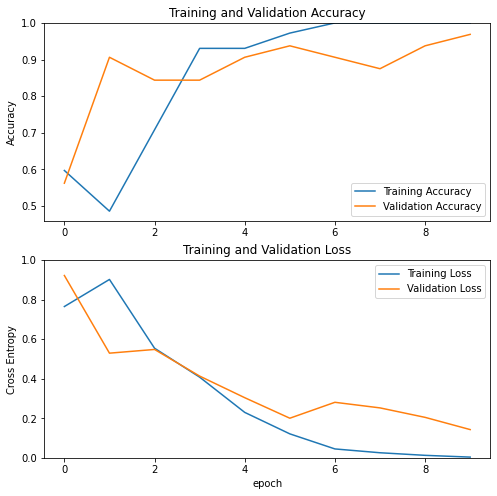

In [30]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [31]:
model.save('pure_model.h5')

# Test model

In [33]:
import imutils
from imutils.video import VideoStream
from imutils.video import FPS
import tensorflow as tf
import keras 
import numpy as np
import time
import cv2
import matplotlib.pyplot as plt
import cvlib as cv
from cvlib.object_detection import draw_bbox
from keras.models import load_model

model = load_model('pure_model.h5')

cam = cv2.VideoCapture(0)
print("[INFO] starting video stream...")
time.sleep(2.0)
fps = FPS().start()

CLASSES = ['TOMATOES', 'ONIONS']

# loop over the frames from the video stream
while True:
    ret, frame = cam.read()
    print(ret)
    frame = imutils.resize(frame, width=800)
     
    # grab the frame dimensions and convert it to a blob
    (h, w) = frame.shape[:2]

    blob = cv2.dnn.blobFromImage(cv2.resize(frame, (224, 224)),0.007843, (300, 300), 127.5)
    # predictions
    #prediction = model.predict(blob)
    detections = model.forward()

    # loop over the detections
    for i in np.arange(0, detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > args["confidence"]:
            # `detections`, then compute the (x, y)-coordinates of
            # the bounding box for the object
            idx = int(detections[0, 0, i, 1])
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")
            # draw the prediction on the frame
            label = "{}: {:.2f}%".format(CLASSES[idx],confidence * 100)
            cv2.rectangle(frame, (startX, startY), (endX, endY),COLORS[idx], 2)
            y = startY - 15 if startY - 15 > 15 else startY + 15
            cv2.putText(frame, label, (startX, y),cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[idx], 2)
            cv2.imshow('object detection', output_image)
            key = cv2.waitKey(1) & 0xFF
            if key == ord('q'):
                break
    
            # update the FPS counter
            fps.update()
            fps.stop()
print("[INFO] elapsed time: {:.2f}".format(fps.elapsed()))
print("[INFO] approx. FPS: {:.2f}".format(fps.fps()))
# do a bit of cleanup
cv2.destroyAllWindows()

[INFO] starting video stream...
False


AttributeError: 'NoneType' object has no attribute 'shape'

In [34]:
"https://www.pyimagesearch.com/2017/09/11/object-detection-with-deep-learning-and-opencv/"

'https://www.pyimagesearch.com/2017/09/11/object-detection-with-deep-learning-and-opencv/'

In [35]:
"https://www.pyimagesearch.com/2017/09/18/real-time-object-detection-with-deep-learning-and-opencv/"

'https://www.pyimagesearch.com/2017/09/18/real-time-object-detection-with-deep-learning-and-opencv/'

In [36]:
"https://docs.opencv.org/2.4/modules/objdetect/doc/cascade_classification.html"

'https://docs.opencv.org/2.4/modules/objdetect/doc/cascade_classification.html'

In [37]:
"https://www.howtogeek.com/357092/what-is-an-xml-file-and-how-do-i-open-one/"

'https://www.howtogeek.com/357092/what-is-an-xml-file-and-how-do-i-open-one/'

In [38]:
"https://towardsdatascience.com/from-raw-images-to-real-time-predictions-with-deep-learning-ddbbda1be0e4"

'https://towardsdatascience.com/from-raw-images-to-real-time-predictions-with-deep-learning-ddbbda1be0e4'